In [90]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
import math

pd.set_option ('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, train_test_split

from sklearn.preprocessing import normalize, LabelEncoder, OneHotEncoder, StandardScaler

In [34]:
df = pd.read_csv(r"C:\Users\QB183AP\OneDrive - EY\Documents\Machine Learning\newborn_train.csv")
print(df.shape)
df.head()

(2398116, 14)


,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,NaN,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
2,NaN,1.00,NaN,1,66.00,NaN,33.00,6,0.00,3,NaN,N,F,3827
3,24.30,1.00,157.00,1,NaN,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240


In [35]:
missing_percentages = df.isnull().sum()/len(df)
missing_percentages

mother_body_mass_index        0.06
mother_marital_status         0.17
mother_delivery_weight        0.01
mother_race                   0.00
mother_height                 0.10
mother_weight_gain            0.03
father_age                    0.19
father_education              0.00
cigarettes_before_pregnancy   0.00
prenatal_care_month           0.00
number_prenatal_visits        0.02
previous_cesarean             0.00
newborn_gender                0.00
newborn_weight                0.00
dtype: float64

In [36]:
missing_percentages[missing_percentages>0]

mother_body_mass_index        0.06
mother_marital_status         0.17
mother_delivery_weight        0.01
mother_height                 0.10
mother_weight_gain            0.03
father_age                    0.19
cigarettes_before_pregnancy   0.00
number_prenatal_visits        0.02
dtype: float64

In [37]:
def check_df(dataframe, head=5):
    print('\033[1m' + 10*"*" + ' SHAPE ' + 10*"*" + '\033[0m')
    print(f"Rows:{dataframe.shape[0]}")
    print(f"Columns:{dataframe.shape[1]}")
    print('\033[1m' + 10*"*" + ' TYPES ' + 10*"*" + '\033[0m')
    print(dataframe.dtypes)
    print('\033[1m' + 10*"*" + ' NUNIQUE ELEMENTS ' + 10*"*" + '\033[0m')
    print(dataframe.nunique())
    print('\033[1m' + 10*"*" + ' NA ' + 10*"*" + '\033[0m')
    print(dataframe.isnull().sum())
    print('\033[1m' + 10*"*" + ' DESCRIBE ' + 10*"*" + '\033[0m')
    print(dataframe.describe())
    print('\033[1m' + 10*"*" + ' DUPLICATED VALUE ' + 10*"*" + '\033[0m')
    print(dataframe.duplicated().sum())
    print('\033[1m' + 10*"*" + ' HEAD ' + 10*"*" + '\033[0m')
    print(dataframe.head(head))

check_df(df)

********** SHAPE **********
Rows:2398116
Columns:14
********** TYPES **********
mother_body_mass_index         float64
mother_marital_status          float64
mother_delivery_weight         float64
mother_race                      int64
mother_height                  float64
mother_weight_gain             float64
father_age                     float64
father_education                 int64
cigarettes_before_pregnancy    float64
prenatal_care_month              int64
number_prenatal_visits         float64
previous_cesarean               object
newborn_gender                  object
newborn_weight                   int64
dtype: object
********** NUNIQUE ELEMENTS **********
mother_body_mass_index          561
mother_marital_status             2
mother_delivery_weight          301
mother_race                       6
mother_height                    46
mother_weight_gain               99
father_age                       78
father_education                  9
cigarettes_before_pregnancy      

EDA - Exploratory Data Analysis

In [38]:
#Numerical Variables EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398116 entries, 0 to 2398115
Data columns (total 14 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   mother_body_mass_index       float64
 1   mother_marital_status        float64
 2   mother_delivery_weight       float64
 3   mother_race                  int64  
 4   mother_height                float64
 5   mother_weight_gain           float64
 6   father_age                   float64
 7   father_education             int64  
 8   cigarettes_before_pregnancy  float64
 9   prenatal_care_month          int64  
 10  number_prenatal_visits       float64
 11  previous_cesarean            object 
 12  newborn_gender               object 
 13  newborn_weight               int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 256.1+ MB


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32660\2227336036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

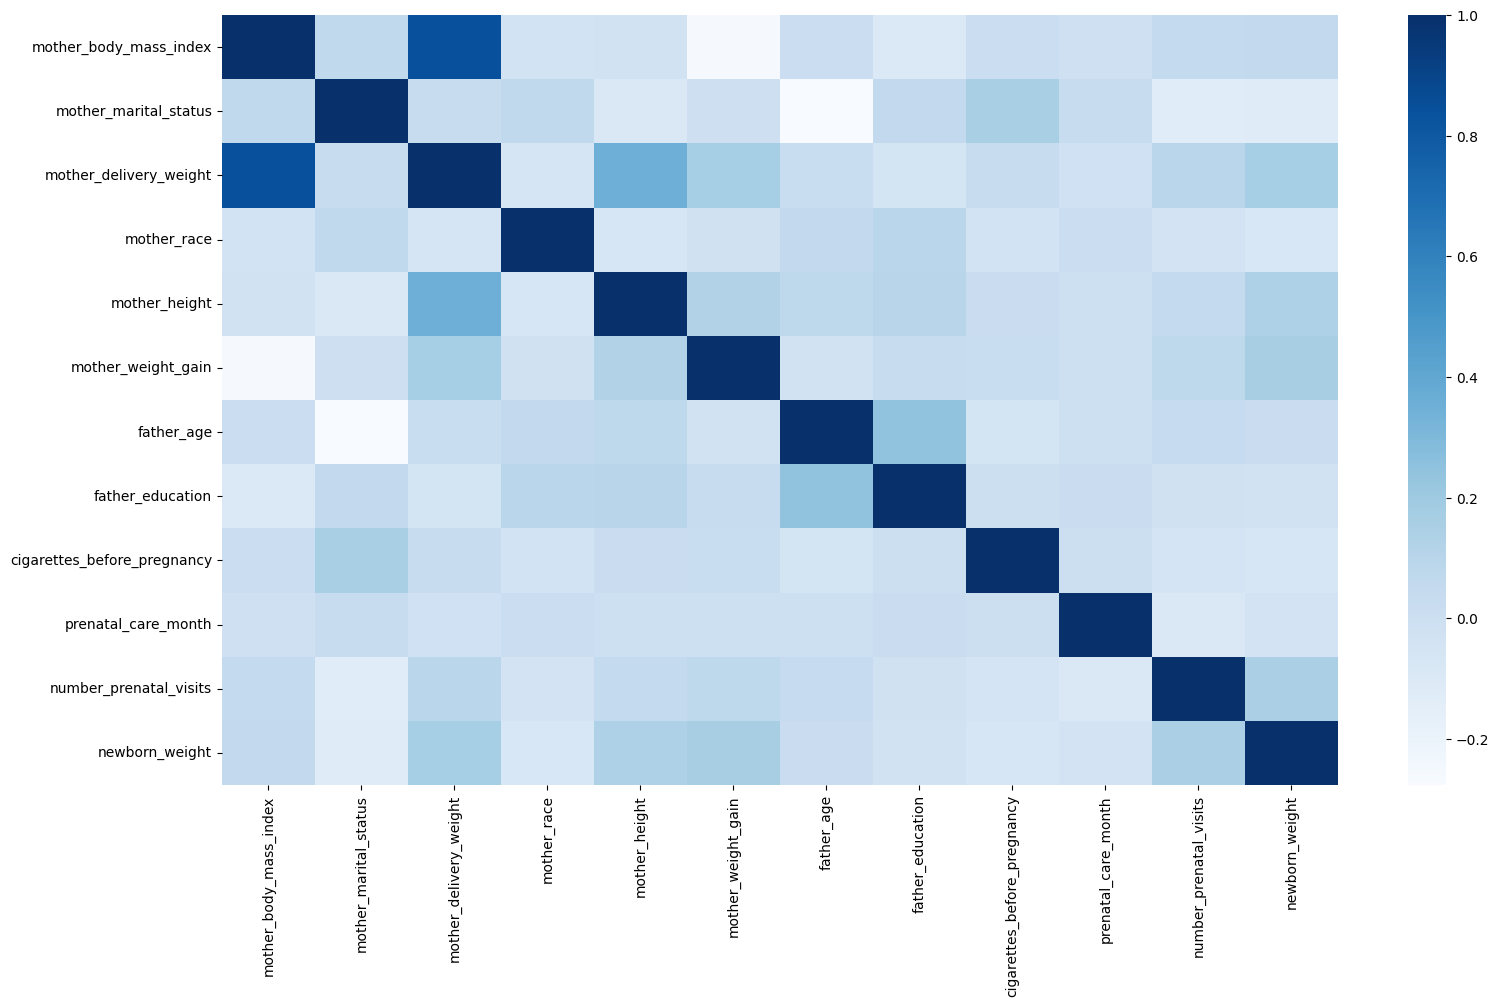

In [39]:
# HEATMAP CORRELATIONS
df_corr = df.corr()
plt.figure(figsize=(18,10))

sns.heatmap(df_corr, cmap="Blues")

<Axes: >

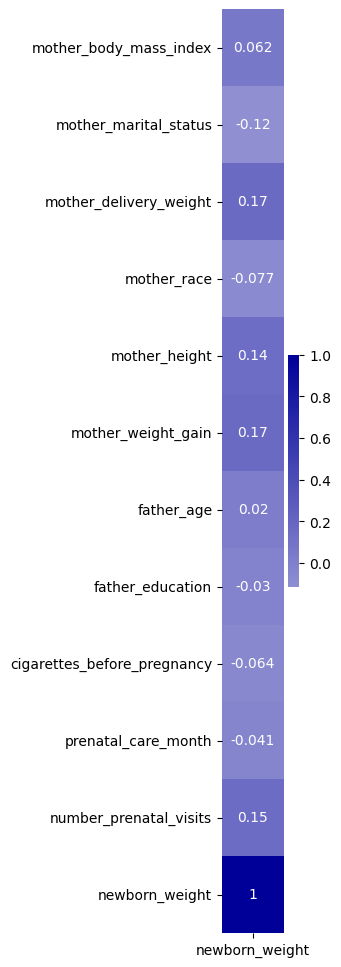

In [40]:
# Correlation with the SalesPrice column
corr_price = df_corr[['newborn_weight']]

# Color map with dark blue in -1 and 1, white in 0 and gradual transition between extremes
plt.figure(figsize=(1,12))
colors = [(1, 1, 1), (0, 0, 0.6)]
cmap = LinearSegmentedColormap.from_list('mycmap', colors)
sns.heatmap(corr_price, annot = True, cmap=cmap, center=0)

In [41]:
#As I cant see much correlation of newborn weight with other variable so I need to do feature engineering

In [42]:
df.columns

Index(['mother_body_mass_index', 'mother_marital_status',
       'mother_delivery_weight', 'mother_race', 'mother_height',
       'mother_weight_gain', 'father_age', 'father_education',
       'cigarettes_before_pregnancy', 'prenatal_care_month',
       'number_prenatal_visits', 'previous_cesarean', 'newborn_gender',
       'newborn_weight'],
      dtype='object')

In [43]:
df_num = df[['mother_body_mass_index', 'mother_delivery_weight',  'mother_height', 'mother_weight_gain', 'father_age', 'cigarettes_before_pregnancy', 
             'number_prenatal_visits', 'newborn_weight']]

df_cat=df[['mother_marital_status', 'mother_race', 'father_education', 'newborn_gender',  'newborn_weight' ]]

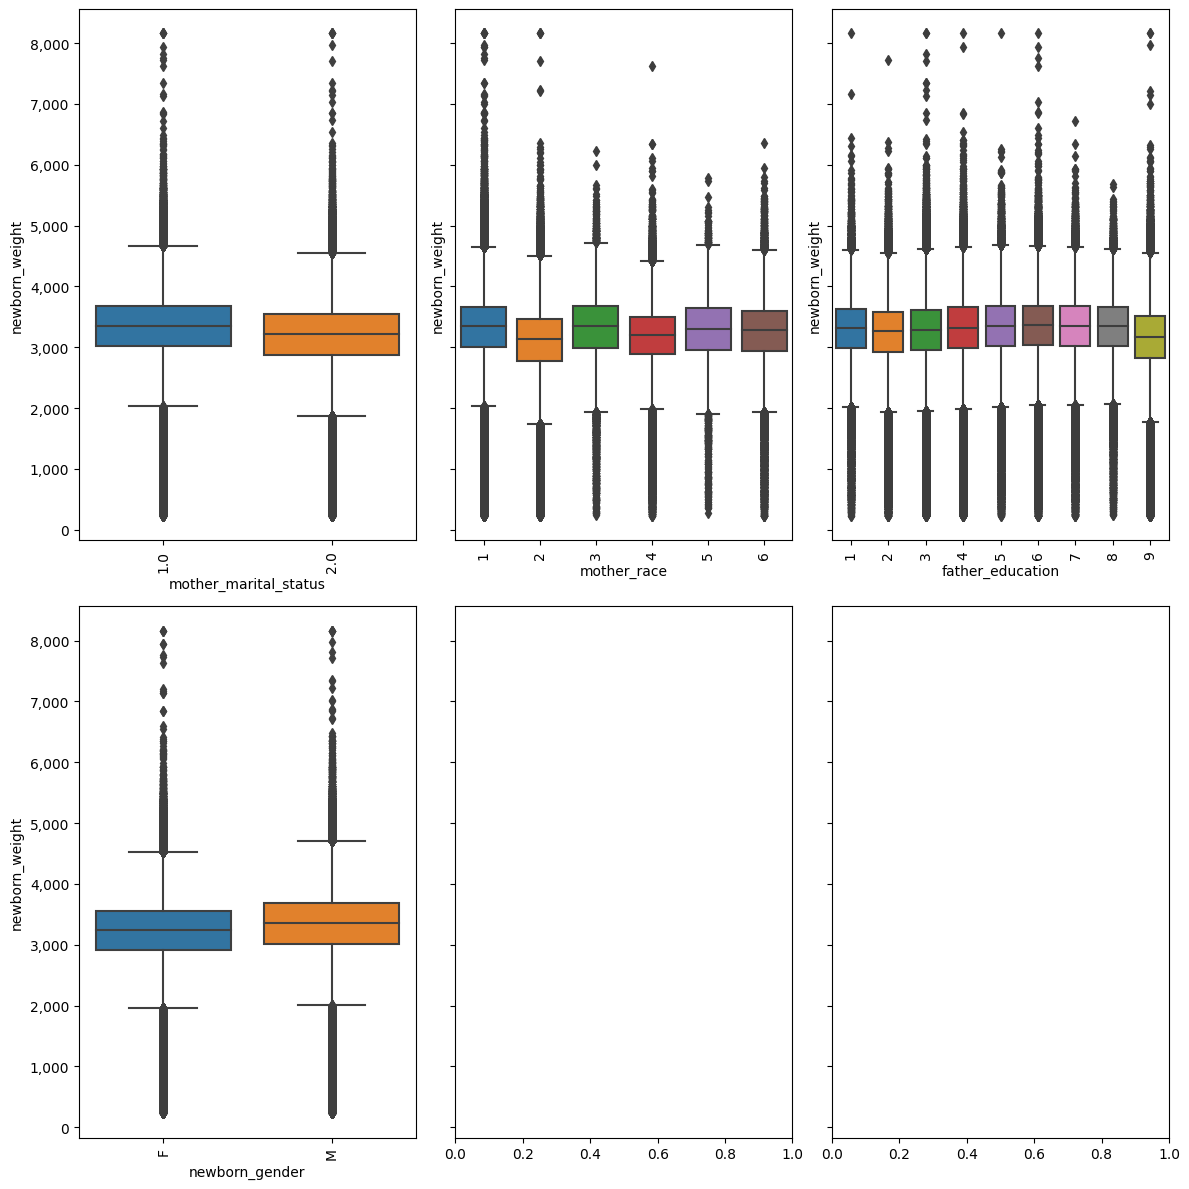

In [44]:
# Boxplot of all the 38 variables in a grid of 13 x 3
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12,12), sharey = True)

for i, ax in enumerate(fig.axes):
    if i < (len(df_cat.columns)-1):
        sns.boxplot(data=df_cat, x=df_cat.columns[i], y='newborn_weight', ax=ax)
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        
fig.tight_layout()

In [45]:
two_val_col= df[["newborn_gender", "mother_marital_status",  "newborn_weight"]]

In [46]:
newborn_sex_M = two_val_col.loc[two_val_col['newborn_gender'] == 'M']
newborn_sex_F = two_val_col.loc[two_val_col['newborn_gender'] == 'F']

Text(0, 0.5, 'Count')

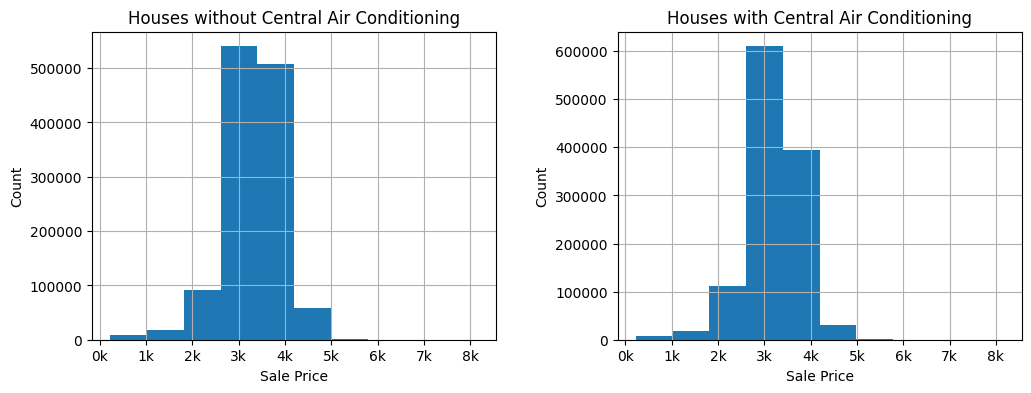

In [47]:
# Histogram of SalePrice of Houses with and without Central Air Conditioning

fig, axes = plt.subplots(1,2, figsize=(12,4))

newborn_sex_M.hist('newborn_weight',ax=axes[0])
axes[0].set_title("Houses without Central Air Conditioning")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Count')

newborn_sex_F.hist('newborn_weight',ax=axes[1])
axes[1].set_title("Houses with Central Air Conditioning")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
axes[1].set_xlabel('Sale Price')
axes[1].set_ylabel('Count')

In [48]:
print(shapiro(newborn_sex_M['newborn_weight']))
print(shapiro(newborn_sex_F['newborn_weight']))

ShapiroResult(statistic=0.957360565662384, pvalue=0.0)
ShapiroResult(statistic=0.9575150609016418, pvalue=0.0)


C:\Users\QB183AP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As we can see from the results in the Shapiro Wilkins test the distributions are not normal and a nonparametric test will be used

In [49]:
stats.mannwhitneyu(x=newborn_sex_M['newborn_weight'], y=newborn_sex_F['newborn_weight'], alternative = 'two-sided')

MannwhitneyuResult(statistic=812174149329.0, pvalue=0.0)

From the test above we reject the null hypothesis and we can consider that there is a significant difference between the two populations, so the newborn gender variable remains in the model

In [50]:
marital_status_y = two_val_col.loc[two_val_col['mother_marital_status'] == 1.0]
marital_status_n = two_val_col.loc[two_val_col['mother_marital_status'] == 2.0]

Text(0, 0.5, 'Count')

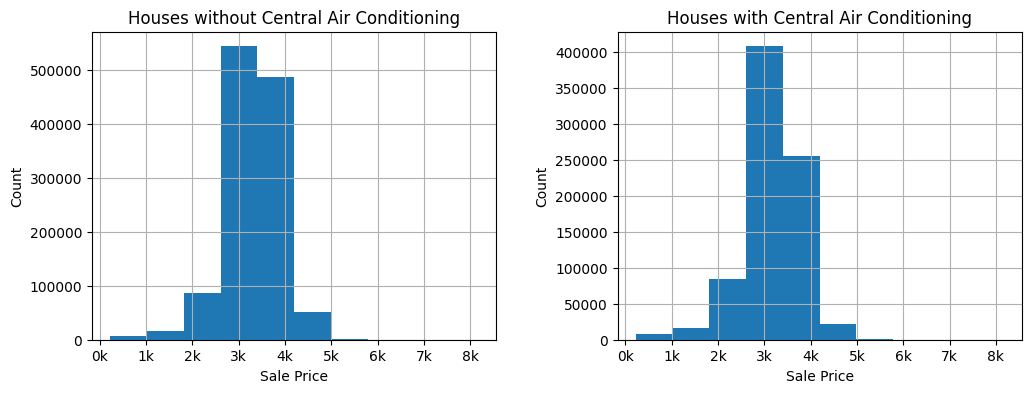

In [51]:
# Histogram of SalePrice of Houses with and without Central Air Conditioning

fig, axes = plt.subplots(1,2, figsize=(12,4))

marital_status_y.hist('newborn_weight',ax=axes[0])
axes[0].set_title("Houses without Central Air Conditioning")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Count')

marital_status_n.hist('newborn_weight',ax=axes[1])
axes[1].set_title("Houses with Central Air Conditioning")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000)))
axes[1].set_xlabel('Sale Price')
axes[1].set_ylabel('Count')

In [52]:
print(shapiro(marital_status_y['newborn_weight']))
print(shapiro(marital_status_n['newborn_weight']))

ShapiroResult(statistic=0.9626283049583435, pvalue=0.0)
ShapiroResult(statistic=0.9531021118164062, pvalue=0.0)


C:\Users\QB183AP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
stats.mannwhitneyu(x=marital_status_y['newborn_weight'], y=marital_status_n['newborn_weight'], alternative = 'two-sided')

MannwhitneyuResult(statistic=541964606709.5, pvalue=0.0)

From the test above we reject the null hypothesis and we can consider that there is a significant difference between the two populations, so the newborn marital status variable remains in the model

In [54]:
three_val_col=  df[[ 'mother_race', 'father_education', 'newborn_weight' ]]

In [55]:
cat_var_list = list(three_val_col.columns)
cat_var_list.remove('newborn_weight')
cat_var_list

['mother_race', 'father_education']

In [56]:
# Target Variable
target_variable = 'newborn_weight'

In [57]:
# Dataframe with the p-value for each Variable

df_kruskal = pd.DataFrame(columns=['Variable', 'statistic', 'pvalue'])

for var in cat_var_list:
    groups = []
    for group in three_val_col[var].dropna().unique():
        
        list_of_values = three_val_col[target_variable][three_val_col[var] == group].values
                
        list_of_values = [x for x in list_of_values if np.isnan(x) == False]
        
        groups.append(list_of_values)
        
    statistic, pvalue = kruskal(*groups)
    row = {'Variable': var, 'statistic': statistic, 'pvalue': pvalue}
    df_kruskal = df_kruskal.append(row, ignore_index=True)
    
    
df_kruskal.sort_values(by=['pvalue'], ignore_index=True, inplace=True)
        
df_kruskal

C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32660\1137549570.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kruskal = df_kruskal.append(row, ignore_index=True)
C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32660\1137549570.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kruskal = df_kruskal.append(row, ignore_index=True)


,Variable,statistic,pvalue
0,mother_race,56608.89,0.00
1,father_education,31498.56,0.00


In [58]:
#remove missing values
#sns.countplot(x=df["new_race"], data=df)

In [59]:
df.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045
1,45.80,NaN,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061
2,NaN,1.00,NaN,1,66.00,NaN,33.00,6,0.00,3,NaN,N,F,3827
3,24.30,1.00,157.00,1,NaN,20.00,27.00,6,0.00,3,9.00,N,M,3997
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240


In [60]:
#Handle Missing Values:

#replace father's age missing values with mode.
mode_value_age = df["father_age"].mode()[0]
df["father_age"].fillna(mode_value_age, inplace=True)

#replace mother marital status null values with number 3 as unknown
df["mother_marital_status"].fillna(3, inplace=True)

#replace father's age missing values with mode.
mode_value_height = df["mother_height"].mode()[0]
df["mother_height"].fillna(mode_value_height, inplace=True)

#replace father's age missing values with mean.
mode_value_bmi = df["mother_body_mass_index"].mode()[0]
df["mother_body_mass_index"].fillna(mode_value_bmi, inplace=True)

In [61]:
# The missing values are less than 5%, hence dropping the missing values.
df.dropna(subset= ["cigarettes_before_pregnancy", "mother_delivery_weight", "mother_weight_gain", "number_prenatal_visits"], inplace=True)

In [62]:
missing_percentages = df.isnull().sum()/len(df)
missing_percentages

mother_body_mass_index        0.00
mother_marital_status         0.00
mother_delivery_weight        0.00
mother_race                   0.00
mother_height                 0.00
mother_weight_gain            0.00
father_age                    0.00
father_education              0.00
cigarettes_before_pregnancy   0.00
prenatal_care_month           0.00
number_prenatal_visits        0.00
previous_cesarean             0.00
newborn_gender                0.00
newborn_weight                0.00
dtype: float64

In [63]:
df.drop_duplicates(inplace=True)
df.shape

(2269437, 14)

In [64]:
df["new_race"]=df["mother_race"].replace([3, 4, 5, 6], 3)

In [65]:
df

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.10,1.00,152.00,1,63.00,27.00,32.00,4,0.00,4,5.00,N,M,3015,1
2398112,34.00,2.00,260.00,2,71.00,16.00,33.00,3,0.00,1,13.00,N,M,3572,2
2398113,24.60,1.00,157.00,1,64.00,18.00,26.00,4,0.00,3,15.00,N,F,3299,1
2398114,26.10,3.00,185.00,1,61.00,47.00,31.00,1,0.00,2,15.00,N,M,3062,1


In [66]:
marital= pd.get_dummies(df["mother_marital_status"])
df=pd.concat([df, marital], axis=1)
df = df.rename(columns={1.0: 'marital_y', 2.0: 'marital_n', 3.0: 'marital_u'})

In [67]:
race= pd.get_dummies(df["new_race"])
df=pd.concat([df, race], axis=1)
df = df.rename(columns={1: 'race_white', 2: 'race_black', 3: 'race_other'})
df

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race,marital_y,marital_n,marital_u,race_white,race_black,race_other
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1,0,1,0,1,0,0
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1,0,0,1,1,0,0
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1,1,0,0,1,0,0
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1,1,0,0,1,0,0
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.10,1.00,152.00,1,63.00,27.00,32.00,4,0.00,4,5.00,N,M,3015,1,1,0,0,1,0,0
2398112,34.00,2.00,260.00,2,71.00,16.00,33.00,3,0.00,1,13.00,N,M,3572,2,0,1,0,0,1,0
2398113,24.60,1.00,157.00,1,64.00,18.00,26.00,4,0.00,3,15.00,N,F,3299,1,1,0,0,1,0,0
2398114,26.10,3.00,185.00,1,61.00,47.00,31.00,1,0.00,2,15.00,N,M,3062,1,0,0,1,1,0,0


In [68]:
df["father_education"].replace(9,0, inplace=True)

In [69]:
sex = pd.get_dummies(df["newborn_gender"])
df = pd.concat([df, sex], axis=1)
df = df.rename(columns={"F": 'sex_f', "M": 'sex_m'})
df

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race,marital_y,marital_n,marital_u,race_white,race_black,race_other,sex_f,sex_m
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1,0,1,0,1,0,0,1,0
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1,0,0,1,1,0,0,1,0
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1,1,0,0,1,0,0,0,1
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1,1,0,0,1,0,0,1,0
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.10,1.00,152.00,1,63.00,27.00,32.00,4,0.00,4,5.00,N,M,3015,1,1,0,0,1,0,0,0,1
2398112,34.00,2.00,260.00,2,71.00,16.00,33.00,3,0.00,1,13.00,N,M,3572,2,0,1,0,0,1,0,0,1
2398113,24.60,1.00,157.00,1,64.00,18.00,26.00,4,0.00,3,15.00,N,F,3299,1,1,0,0,1,0,0,1,0
2398114,26.10,3.00,185.00,1,61.00,47.00,31.00,1,0.00,2,15.00,N,M,3062,1,0,0,1,1,0,0,0,1


In [70]:
bmi_categories = {
    (float('-inf'), 18.5): 'Underweight',
    (18.5, 24.9): 'Normal Weight',
    (25.0, 29.9): 'Overweight',
    (30.0, float('inf')): 'Obese'
}

bin_edges = [x for (x, _) in bmi_categories.keys()] + [float('inf')]
bin_labels = [v for v in bmi_categories.values()]

df['bmi_category'] = pd.cut(df['mother_body_mass_index'], bins=bin_edges, labels=bin_labels, right=False)

bmi_encoding_order = {
    'Underweight': 1,
    'Normal Weight': 2,
    'Overweight': 3,
    'Obese': 4
}

df['bmi_category'] = df['bmi_category'].replace(bmi_encoding_order)

In [71]:
df

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race,marital_y,marital_n,marital_u,race_white,race_black,race_other,sex_f,sex_m,bmi_category
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1,0,1,0,1,0,0,1,0,4
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1,0,0,1,1,0,0,1,0,4
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1,1,0,0,1,0,0,0,1,2
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1,1,0,0,1,0,0,1,0,2
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1,0,1,0,1,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.10,1.00,152.00,1,63.00,27.00,32.00,4,0.00,4,5.00,N,M,3015,1,1,0,0,1,0,0,0,1,2
2398112,34.00,2.00,260.00,2,71.00,16.00,33.00,3,0.00,1,13.00,N,M,3572,2,0,1,0,0,1,0,0,1,4
2398113,24.60,1.00,157.00,1,64.00,18.00,26.00,4,0.00,3,15.00,N,F,3299,1,1,0,0,1,0,0,1,0,2
2398114,26.10,3.00,185.00,1,61.00,47.00,31.00,1,0.00,2,15.00,N,M,3062,1,0,0,1,1,0,0,0,1,3


In [72]:
df["new_bmi"]=(df["mother_delivery_weight"]/df["mother_height"]**2)*703

In [73]:
age_categories = {
    (float('-inf'), 19): 'Teenager',
    (20, 39): 'Young Adult',
    (40, 59): 'Middle-Aged',
    (60,79): 'Senior', 
    (80,float('inf')):'Elderly'
}

bin_edges = [x for (x, _) in age_categories.keys()] + [float('inf')]
bin_labels = [v for v in age_categories.values()]

df['father_age_category'] = pd.cut(df['father_age'], bins=bin_edges, labels=bin_labels, right=False)

age_cat_order = {
    'Teenager': 1,
    'Young Adult': 2,
    'Middle-Aged': 3,
    'Senior': 4,
    'Elderly': 5
}

df['father_age_category'] = df['father_age_category'].replace(age_cat_order)



df.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race,marital_y,marital_n,marital_u,race_white,race_black,race_other,sex_f,sex_m,bmi_category,new_bmi,father_age_category
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1,0,1,0,1,0,0,1,0,4,36.61,2
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1,0,0,1,1,0,0,1,0,4,50.29,2
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1,1,0,0,1,0,0,0,1,2,26.95,2
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1,1,0,0,1,0,0,1,0,2,31.12,2
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1,0,1,0,1,0,0,0,1,4,39.65,2


In [74]:

cig_preg_categories = {
    (0,0):"Non-Smoker",
    (1, 97): 'Light-Smoker',
    (98,float('inf')):'Heavy-Smoker'
}

bin_edges = [x for (x, _) in cig_preg_categories.keys()] + [float('inf')]
bin_labels = [v for v in cig_preg_categories.values()]

df['cig_categories'] = pd.cut(df['cigarettes_before_pregnancy'], bins=bin_edges, labels=bin_labels, right=False)

cig_cat_order = {
    'Non-Smoker': 1,
    'Light-Smoker': 2,
    'Heavy-Smoker': 3
}

df['cig_categories'] = df['cig_categories'].replace(cig_cat_order)

df.head()

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race,marital_y,marital_n,marital_u,race_white,race_black,race_other,sex_f,sex_m,bmi_category,new_bmi,father_age_category,cig_categories
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1,0,1,0,1,0,0,1,0,4,36.61,2,1
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1,0,0,1,1,0,0,1,0,4,50.29,2,1
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1,1,0,0,1,0,0,0,1,2,26.95,2,1
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1,1,0,0,1,0,0,1,0,2,31.12,2,1
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1,0,1,0,1,0,0,0,1,4,39.65,2,1


In [75]:
bmi_categories = {
    (float('-inf'), 18.5): 'Underweight',
    (18.5, 24.9): 'Normal Weight',
    (25.0, 29.9): 'Overweight',
    (30.0, float('inf')): 'Obese'
}

bin_edges = [x for (x, _) in bmi_categories.keys()] + [float('inf')]
bin_labels = [v for v in bmi_categories.values()]

df['new_bmi_category'] = pd.cut(df['new_bmi'], bins=bin_edges, labels=bin_labels, right=False)

bmi_encoding_order = {
    'Underweight': 1,
    'Normal Weight': 2,
    'Overweight': 3,
    'Obese': 4
}

df['new_bmi_category'] = df['new_bmi_category'].replace(bmi_encoding_order)

In [76]:
df = df[(df["father_age"]>=16) & (df["father_age"] <= 80)]

In [77]:
df

,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight,new_race,marital_y,marital_n,marital_u,race_white,race_black,race_other,sex_f,sex_m,bmi_category,new_bmi,father_age_category,cig_categories,new_bmi_category
0,30.80,2.00,220.00,1,65.00,35.00,29.00,6,0.00,2,10.00,N,F,3045,1,0,1,0,1,0,0,1,0,4,36.61,2,1,4
1,45.80,3.00,293.00,1,64.00,26.00,37.00,4,0.00,3,10.00,N,F,3061,1,0,0,1,1,0,0,1,0,4,50.29,2,1,4
3,24.30,1.00,157.00,1,64.00,20.00,27.00,6,0.00,3,9.00,N,M,3997,1,1,0,0,1,0,0,0,1,2,26.95,2,1,3
4,24.10,1.00,187.00,1,65.00,42.00,29.00,8,0.00,2,12.00,N,F,3240,1,1,0,0,1,0,0,1,0,2,31.12,2,1,4
5,30.90,2.00,231.00,1,64.00,51.00,27.00,3,0.00,4,10.00,N,M,3544,1,0,1,0,1,0,0,0,1,4,39.65,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398111,22.10,1.00,152.00,1,63.00,27.00,32.00,4,0.00,4,5.00,N,M,3015,1,1,0,0,1,0,0,0,1,2,26.92,2,1,3
2398112,34.00,2.00,260.00,2,71.00,16.00,33.00,3,0.00,1,13.00,N,M,3572,2,0,1,0,0,1,0,0,1,4,36.26,2,1,4
2398113,24.60,1.00,157.00,1,64.00,18.00,26.00,4,0.00,3,15.00,N,F,3299,1,1,0,0,1,0,0,1,0,2,26.95,2,1,3
2398114,26.10,3.00,185.00,1,61.00,47.00,31.00,1,0.00,2,15.00,N,M,3062,1,0,0,1,1,0,0,0,1,3,34.95,2,1,4


In [78]:
df.columns

Index(['mother_body_mass_index', 'mother_marital_status',
       'mother_delivery_weight', 'mother_race', 'mother_height',
       'mother_weight_gain', 'father_age', 'father_education',
       'cigarettes_before_pregnancy', 'prenatal_care_month',
       'number_prenatal_visits', 'previous_cesarean', 'newborn_gender',
       'newborn_weight', 'new_race', 'marital_y', 'marital_n', 'marital_u',
       'race_white', 'race_black', 'race_other', 'sex_f', 'sex_m',
       'bmi_category', 'new_bmi', 'father_age_category', 'cig_categories',
       'new_bmi_category'],
      dtype='object')

In [79]:
df=df[['mother_delivery_weight', 'mother_height', 'mother_weight_gain', 'father_education', 'cigarettes_before_pregnancy','number_prenatal_visits', 
       'newborn_weight', 'marital_y', 'marital_n', 'race_white', 'race_black',  'sex_f', 'bmi_category', 'father_age_category', 'cig_categories', 'new_bmi_category']]

In [80]:
df.head()

,mother_delivery_weight,mother_height,mother_weight_gain,father_education,cigarettes_before_pregnancy,number_prenatal_visits,newborn_weight,marital_y,marital_n,race_white,race_black,sex_f,bmi_category,father_age_category,cig_categories,new_bmi_category
0,220.00,65.00,35.00,6,0.00,10.00,3045,0,1,1,0,1,4,2,1,4
1,293.00,64.00,26.00,4,0.00,10.00,3061,0,0,1,0,1,4,2,1,4
3,157.00,64.00,20.00,6,0.00,9.00,3997,1,0,1,0,0,2,2,1,3
4,187.00,65.00,42.00,8,0.00,12.00,3240,1,0,1,0,1,2,2,1,4
5,231.00,64.00,51.00,3,0.00,10.00,3544,0,1,1,0,0,4,2,1,4


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32660\4005360871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


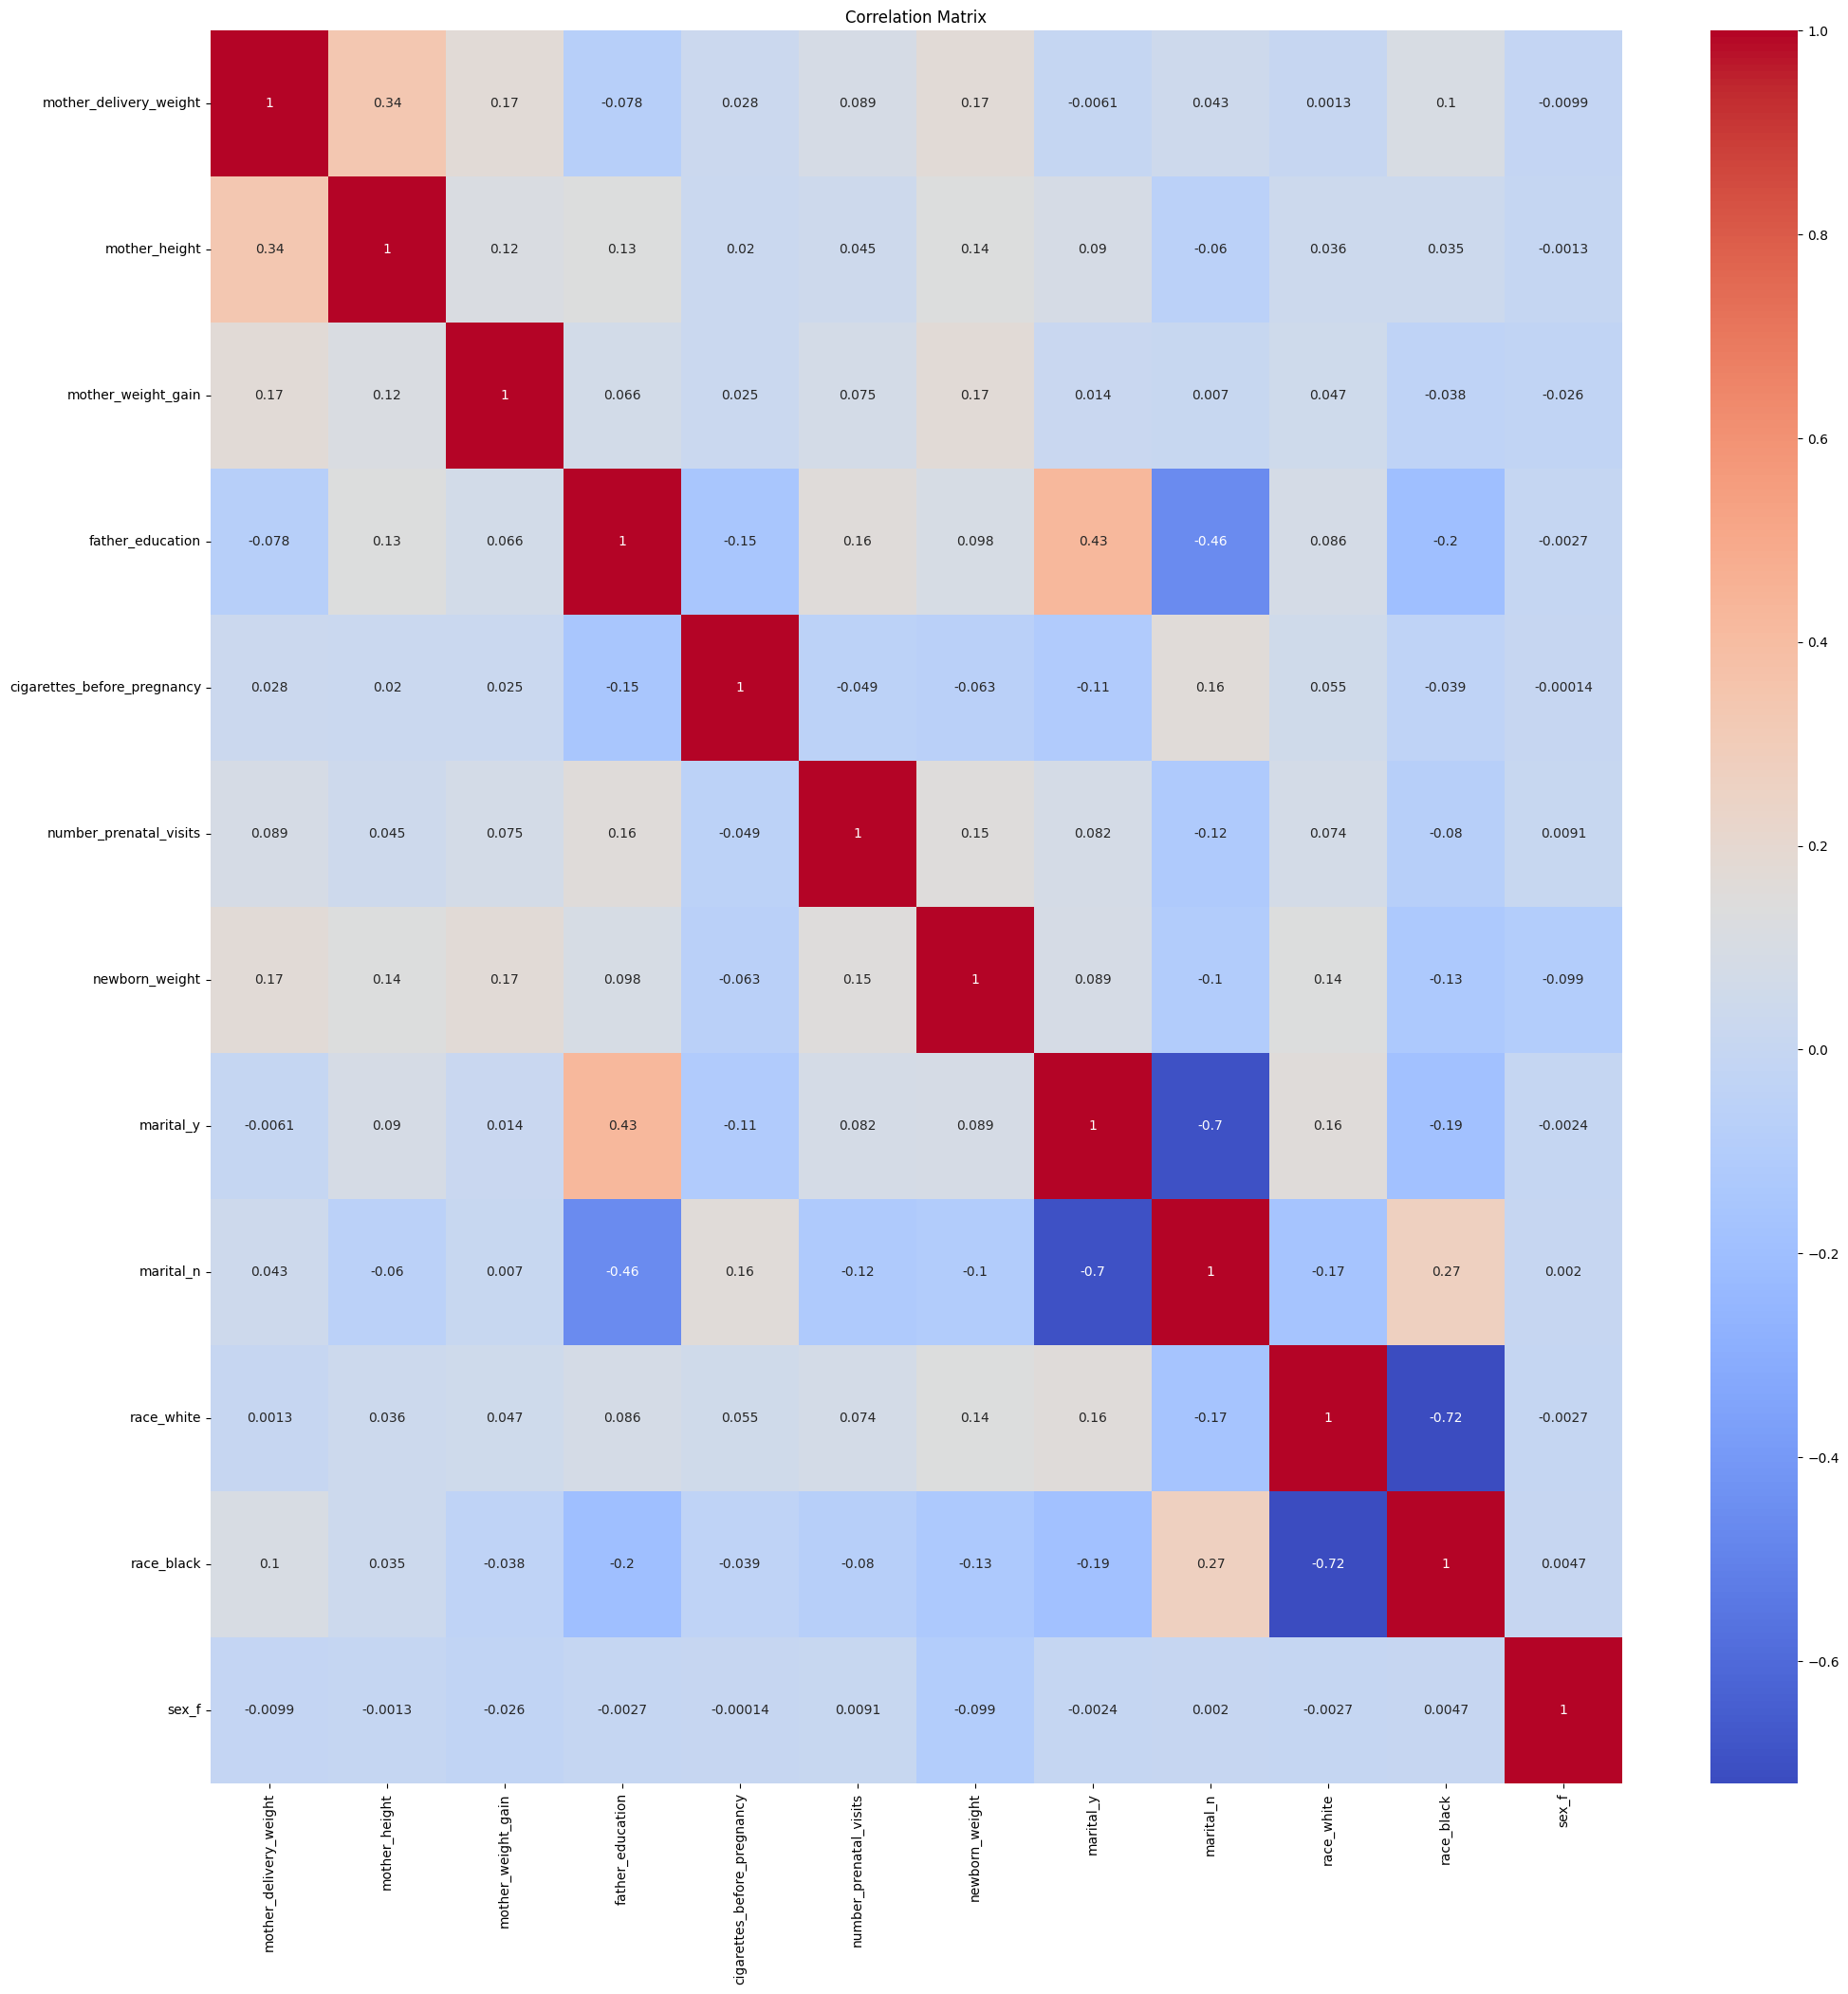

In [81]:
corr_matrix = df.corr()
lower_triangle = np.tril(np.abs(corr_matrix), k=-1)

# Identify the indices of highly correlated variables
high_corr_cols = np.where(lower_triangle < 0.8)

# Remove the highly correlated variables from the DataFrame
X_new = df.drop(df.columns[high_corr_cols[0]], axis=1)

# plot the correlation matrix as a heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

LASSO REGRESSION FOR FEATURE SELECTION

In [82]:
X = df.drop("newborn_weight", axis=1)
y = df['newborn_weight']

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred= lasso.predict(X_val)

mse= np.mean((y_pred - y_val)**2)
lasso_coef = pd.DataFrame()
lasso_coef["Columns"]= X_train.columns
lasso_coef["Coef_estimate"] = pd.Series(lasso.coef_)
lasso_coef.sort_values(by="Coef_estimate")

,Columns,Coef_estimate
9,race_black,-137.57
10,sex_f,-105.95
13,cig_categories,-79.36
7,marital_n,-36.34
12,father_age_category,-4.62
4,cigarettes_before_pregnancy,-3.91
11,bmi_category,0.00
0,mother_delivery_weight,0.86
2,mother_weight_gain,4.40
6,marital_y,5.87


In [87]:
df1=df.copy()

df1.drop(["race_black", "sex_f", "cig_categories", "marital_n",  "father_age_category", "cigarettes_before_pregnancy", "bmi_category"], inplace=True, axis=1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [91]:
df1['newborn_weight'] = np.log1p(df1['newborn_weight'])

X = df1.drop(['newborn_weight'],axis=1)
y = df1['newborn_weight']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [92]:
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get the predicted values
y_pred = regressor.predict(X_val)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)


# Print the MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

evaluation_metrics1 = pd.DataFrame({'Metric_lasso': ['Mean Absolute Percentage Error (MAPE)' ,'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
                                              'Mean Absolute Error (MAE)', 'R-squared (R^2)'],
                                   'Value': [mape, mse, rmse, mae, r2]})

evaluation_metrics1

Mean Absolute Percentage Error (MAPE): 0.7052772523855572
Mean Squared Error (MSE): 0.0006067851614017106
Root Mean Squared Error (RMSE): 0.024633009588795895
Mean Absolute Error (MAE): 0.015389141464630057
R-squared (R^2): 0.07422397254914859


,Metric_lasso,Value
0,Mean Absolute Percentage Error (MAPE),0.71
1,Mean Squared Error (MSE),0.00
2,Root Mean Squared Error (RMSE),0.02
3,Mean Absolute Error (MAE),0.02
4,R-squared (R^2),0.07


RFE 

In [94]:
X = df.drop("newborn_weight", axis=1)
y = df['newborn_weight']

In [95]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

lin_reg = LinearRegression()
rfe_mod = RFE(lin_reg)
myvalues= rfe_mod.fit(X,y)
print(myvalues.ranking_)
print(myvalues.support_)
print(myvalues.n_features_)
X.columns[myvalues.support_]

[9 2 7 6 8 5 4 1 1 1 1 1 3 1 1]
[False False False False False False False  True  True  True  True  True
 False  True  True]
7


Index(['marital_n', 'race_white', 'race_black', 'sex_f', 'bmi_category',
       'cig_categories', 'new_bmi_category'],
      dtype='object')

In [98]:
df1=df.copy()

df1=df[['marital_n', 'race_white', 'race_black', 'sex_f', 'bmi_category',
       'cig_categories', 'new_bmi_category', "newborn_weight"]]
df1

,marital_n,race_white,race_black,sex_f,bmi_category,cig_categories,new_bmi_category,newborn_weight
0,1,1,0,1,4,1,4,3045
1,0,1,0,1,4,1,4,3061
3,0,1,0,0,2,1,3,3997
4,0,1,0,1,2,1,4,3240
5,1,1,0,0,4,1,4,3544
...,...,...,...,...,...,...,...,...
2398111,0,1,0,0,2,1,3,3015
2398112,1,0,1,0,4,1,4,3572
2398113,0,1,0,1,2,1,3,3299
2398114,0,1,0,0,3,1,4,3062


In [101]:
df1['newborn_weight'] = np.log1p(df1['newborn_weight'])

X = df1.drop(['newborn_weight'],axis=1)
y = df1['newborn_weight']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

C:\Users\QB183AP\AppData\Local\Temp\ipykernel_32660\3834330202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['newborn_weight'] = np.log1p(df1['newborn_weight'])


In [102]:
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get the predicted values
y_pred = regressor.predict(X_val)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)


# Print the MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

evaluation_metrics2 = pd.DataFrame({'Metric_rfe': ['Mean Absolute Percentage Error (MAPE)' ,'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
                                              'Mean Absolute Error (MAE)', 'R-squared (R^2)'],
                                   'Value': [mape, mse, rmse, mae, r2]})

evaluation_metrics2

Mean Absolute Percentage Error (MAPE): 0.41967496232918217
Mean Squared Error (MSE): 6.276896614499663e-05
Root Mean Squared Error (RMSE): 0.00792268680089
Mean Absolute Error (MAE): 0.004856793837346621
R-squared (R^2): 0.04643565849996478


,Metric_rfe,Value
0,Mean Absolute Percentage Error (MAPE),0.42
1,Mean Squared Error (MSE),0.00
2,Root Mean Squared Error (RMSE),0.01
3,Mean Absolute Error (MAE),0.00
4,R-squared (R^2),0.05


SelectKBEST

In [103]:
X = df.drop("newborn_weight", axis=1)
y = df['newborn_weight']

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_feature = SelectKBest(score_func=chi2, k=13)
order_feature= ordered_rank_feature.fit(X,y)

score=pd.DataFrame(order_feature.scores_, columns=["Score"])
columns= pd.DataFrame(X.columns, columns=["Features"])
features_score=pd.concat([columns, score], axis=1)
features_score.sort_values(by='Score', ascending=False)

,Features,Score
0,mother_delivery_weight,1011100.85
2,mother_weight_gain,577458.57
4,cigarettes_before_pregnancy,386371.40
5,number_prenatal_visits,98567.19
9,race_black,45062.23
3,father_education,38947.06
7,marital_n,25256.25
10,sex_f,19745.66
6,marital_y,15830.06
8,race_white,14627.15


In [105]:
df1=df.copy()

df1.drop(["father_age_category",  "cig_categories", "mother_height", "bmi_category", "new_bmi_category"], inplace=True, axis=1)

In [106]:
df1['newborn_weight'] = np.log1p(df1['newborn_weight'])

X = df1.drop(['newborn_weight'],axis=1)
y = df1['newborn_weight']

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [107]:
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get the predicted values
y_pred = regressor.predict(X_val)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

evaluation_metrics3 = pd.DataFrame({'Metric_kBest': ['Mean Absolute Percentage Error (MAPE)' ,'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
                                              'Mean Absolute Error (MAE)', 'R-squared (R^2)'],
                                   'Value': [mape, mse, rmse, mae, r2]})

evaluation_metrics3

Mean Absolute Percentage Error (MAPE): 1.7365961884238625
Mean Squared Error (MSE): 0.04521130776628963
Root Mean Squared Error (RMSE): 0.2126295082209655
Mean Absolute Error (MAE): 0.13669632954735925
R-squared (R^2): 0.08368287573114475


,Metric_kBest,Value
0,Mean Absolute Percentage Error (MAPE),1.74
1,Mean Squared Error (MSE),0.05
2,Root Mean Squared Error (RMSE),0.21
3,Mean Absolute Error (MAE),0.14
4,R-squared (R^2),0.08


In [108]:
df_metric= pd.concat([evaluation_metrics1, evaluation_metrics2, evaluation_metrics3], axis=1)
df_metric

,Metric_lasso,Value,Metric_rfe,Value,Metric_kBest,Value
0,Mean Absolute Percentage Error (MAPE),0.71,Mean Absolute Percentage Error (MAPE),0.42,Mean Absolute Percentage Error (MAPE),1.74
1,Mean Squared Error (MSE),0.00,Mean Squared Error (MSE),0.00,Mean Squared Error (MSE),0.05
2,Root Mean Squared Error (RMSE),0.02,Root Mean Squared Error (RMSE),0.01,Root Mean Squared Error (RMSE),0.21
3,Mean Absolute Error (MAE),0.02,Mean Absolute Error (MAE),0.00,Mean Absolute Error (MAE),0.14
4,R-squared (R^2),0.07,R-squared (R^2),0.05,R-squared (R^2),0.08


In [ ]:
#Basically best festure selection is coming from RFE

NameError: name 'abc' is not defined

In [ ]:
abc

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#univariate analysis

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_feature = SelectKBest(score_func=chi2, k=13)
order_feature= ordered_rank_feature.fit(X,y)

score=pd.DataFrame(order_feature.scores_, columns=["Score"])
columns= pd.DataFrame(X.columns, columns=["Features"])
features_score=pd.concat([columns, score], axis=1)
features_score.sort_values(by='Score', ascending=False)

,Features,Score
0,mother_delivery_weight,1011087.34
2,mother_weight_gain,577454.75
5,number_prenatal_visits,98563.85
17,new_bmi,93142.52
9,mother_race_black,45060.37
3,father_education,38947.71
7,marital_status_N,25255.78
15,newborn_gender_F,19746.13
11,mother_race_asian,18003.10
6,marital_status_Y,15830.25


In [ ]:
featy

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

lin_reg = LinearRegression()
rfe_mod = RFE(lin_reg)
myvalues= rfe_mod.fit(X,y)
print(myvalues.ranking_)
print(myvalues.support_)
print(myvalues.n_features_)
X.columns[myvalues.support_]

[11  1  9  6  2  3 10  1  7  1  1  1  1  1  8  1  1  4  5  1]
[False  True False False False False False  True False  True  True  True
  True  True False  True  True False False  True]
10


Index(['mother_height', 'marital_status_N', 'mother_race_black',
       'mother_race_AIAN', 'mother_race_asian', 'mother_race_e',
       'previous_cesarean_N', 'newborn_gender_F', 'BMI_Category',
       'cig_categories'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred= lasso.predict(X_val)

mse= np.mean((y_pred - y_val)**2)
lasso_coef = pd.DataFrame()
lasso_coef["Columns"]= X_train.columns
lasso_coef["Coef_estimate"] = pd.Series(lasso.coef_)
lasso_coef

C:\Users\QB183AP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.224e+07, tolerance: 5.401e+07
  model = cd_fast.enet_coordinate_descent(


,Columns,Coef_estimate
0,mother_delivery_weight,-0.61
1,mother_height,29.39
2,mother_weight_gain,5.23
3,father_education,8.31
4,prenatal_care_month,-24.40
5,number_prenatal_visits,17.15
6,marital_status_Y,0.70
7,marital_status_N,-44.44
8,mother_race_white,57.53
9,mother_race_black,-147.07


In [ ]:
lasso_coef.sort_values(by="Coef_estimate")

,Columns,Coef_estimate
9,mother_race_black,-147.07
19,cig_categories,-136.32
15,newborn_gender_F,-105.52
7,marital_status_N,-44.44
4,prenatal_care_month,-24.40
13,previous_cesarean_N,-21.36
11,mother_race_asian,-16.79
18,father_age_category,-6.88
0,mother_delivery_weight,-0.61
14,previous_cesarean_Y,0.00


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

MI= pd.DataFrame(mutual_info)
MI

In [ ]:
#lasso
df1=df.copy()
df1.drop(["mother_race_black", "cig_categories", "newborn_gender_F", "marital_status_N", "prenatal_care_month", "previous_cesarean", "previous_cesarean_N", "mother_race_asian", "father_age_category", "mother_delivery_weight"], axis=1, inplace=True)

In [ ]:
df1.head()   

,mother_height,mother_weight_gain,father_education,number_prenatal_visits,newborn_weight,marital_status_Y,mother_race_white,mother_race_AIAN,mother_race_e,previous_cesarean_Y,BMI_Category,new_bmi
0,65.00,35.00,6,10.00,3045,0.00,1.00,0.00,0.00,0.00,4,36.61
1,64.00,26.00,4,10.00,3061,0.00,1.00,0.00,0.00,0.00,4,50.29
3,64.12,20.00,6,9.00,3997,1.00,1.00,0.00,0.00,0.00,2,26.84
4,65.00,42.00,8,12.00,3240,1.00,1.00,0.00,0.00,0.00,2,31.12
5,64.12,51.00,3,10.00,3544,0.00,1.00,0.00,0.00,0.00,4,39.50


In [ ]:
X1 = df1.drop("newborn_weight", axis=1)
y1 = df1['newborn_weight']

In [ ]:
df1['newborn_weight'] = np.log1p(df1['newborn_weight'])

X = df1.drop(['newborn_weight'],axis=1)
y = df1['newborn_weight']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train  ", X_train.shape)
print("X_test  ", X_test.shape)
print("y_train  ", y_train.shape)
print("y_test  ", y_test.shape)

X_train   (1815123, 11)
X_test   (453781, 11)
y_train   (1815123,)
y_test   (453781,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
y_pred

array([8.07107063, 7.9804853 , 8.1758967 , ..., 8.08058191, 8.01328677,
       8.0828809 ])

In [ ]:
mean_squared_error(y_test, y_pred)
mean_absolute_percentage_error(y_test, y_pred)

0.01747023941292455

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.07653946041025841
R2_score (train):  0.07655903552343635
R2_score (test):  0.07554826125054315
RMSE:  0.21291937535782038


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)


from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.07653946041025841
R2_score (train):  0.09895573928744039
R2_score (test):  0.09701024807365244
RMSE:  0.21043330316906417


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)


from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.09881206103357312
R2_score (train):  0.09895661154015822
R2_score (test):  0.09701188567040098
RMSE:  0.2104331123556864


In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  -0.8237189155635104
R2_score (train):  0.9363315008604665
R2_score (test):  -0.8248893453870603
RMSE:  784.94802823508


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gradient Boosting Regression model
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Create a Gradient Boosting Regression model
regressor_gb = GradientBoostingRegressor()

# Fit the model on the training data
regressor_gb.fit(X_train, y_train)

# Predicting Cross Validation Score on the Test set results
cv_gb = cross_val_score(estimator=regressor_gb, X=X_train, y=y_train, cv=10)

# Predicting R2 Score on the Train set results
y_pred_gb_train = regressor_gb.predict(X_train)
r2_score_gb_train = r2_score(y_train, y_pred_gb_train)

# Predicting R2 Score on the Test set results
y_pred_gb_test = regressor_gb.predict(X_test)
r2_score_gb_test = r2_score(y_test, y_pred_gb_test)

# Predicting RMSE on the Test set results
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb_test))

print('CV:', cv_gb.mean())
print('R2_score (train):', r2_score_gb_train)
print('R2_score (test):', r2_score_gb_test)
print('RMSE:', rmse_gb)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Create an SVR model
regressor_svr = SVR()

# Fit the model on the training data
regressor_svr.fit(X_train, y_train)

# Predict the target variable for the training and test sets
y_pred_svr_train = regressor_svr.predict(X_train)
y_pred_svr_test = regressor_svr.predict(X_test)

# Calculate the R2 scores for the training and test sets
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Calculate the RMSE for the test set
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))

print('R2_score (train):', r2_score_svr_train)
print('R2_score (test):', r2_score_svr_test)
print('RMSE:', rmse_svr)


In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

MemoryError: Unable to allocate 13.8 MiB for an array with shape (1815134,) and data type float64